# **Table of Content**

1. *Importing libraries*

2. *Loading Dataset*

3. *Data Exploration*

4. *Data Pre-processing*

5. *Clustering Using K-Means*

6. *Clustering Using DBSCAN*

7. *Clustering Using Hierarchical Clustering*

8. *Conclusion* 

## **Importing Libraries**

In [39]:
# important libraries...
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# libraries for utilities...
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# libraries for clustering...
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import silhouette_score


#fontdict
font_l={'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
font_t={'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

---

## **Loding dataset**

In [6]:
# Importing opendataset library and downloading dataset
# one time executin only
# import opendatasets as ods
# ods.download("https://www.kaggle.com/datasets/shwetabh123/mall-customers")


In [9]:
# Reading the dataset
df = pd.read_csv("X:\Internship\INTERNSAVY-s_TASK\Task-2\mall-customers\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---

## **Data Exploration**

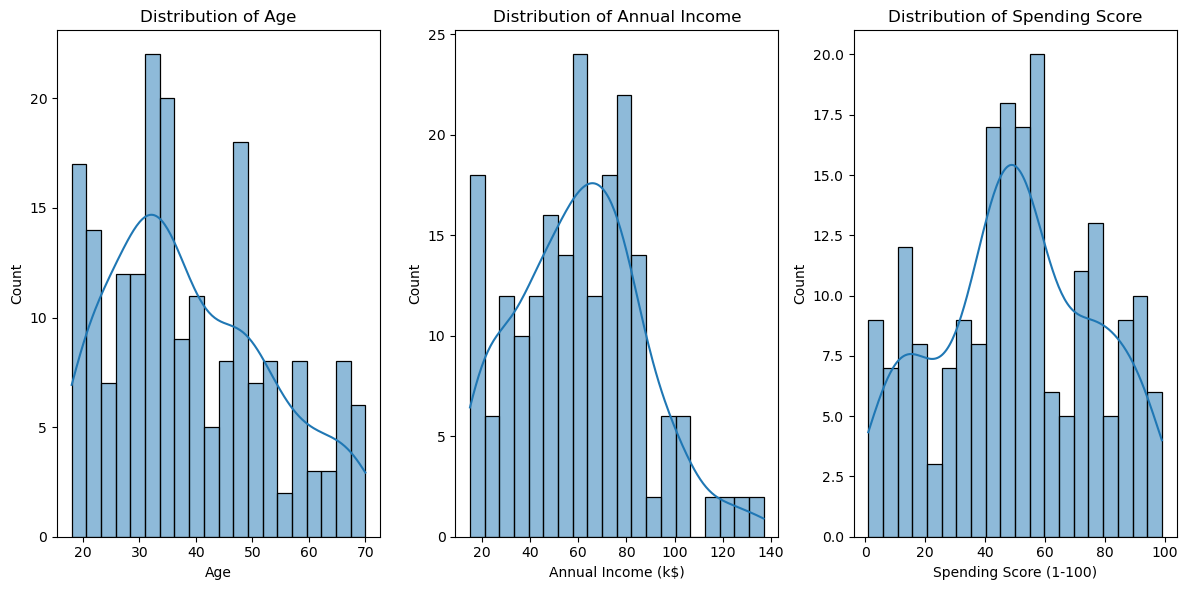

In [10]:
# Create histograms to understand the distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Annual Income (k$)', bins=20, kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Spending Score (1-100)', bins=20, kde=True)
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

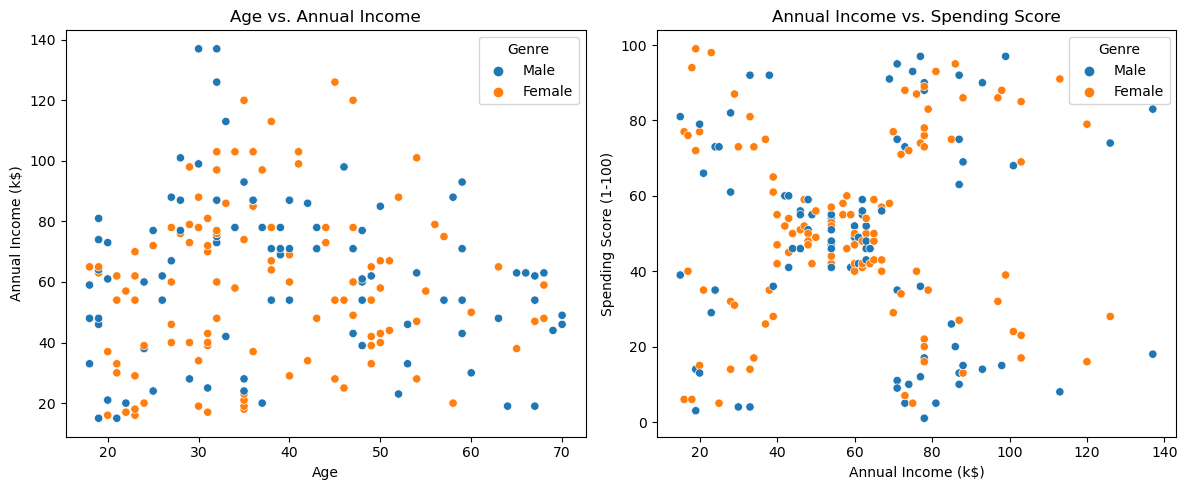

In [13]:
# Create scatter plots to explore relationships between pairs of features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Genre', marker='o')
plt.title('Age vs. Annual Income')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', marker='o')
plt.title('Annual Income vs. Spending Score')

plt.tight_layout()
plt.show()

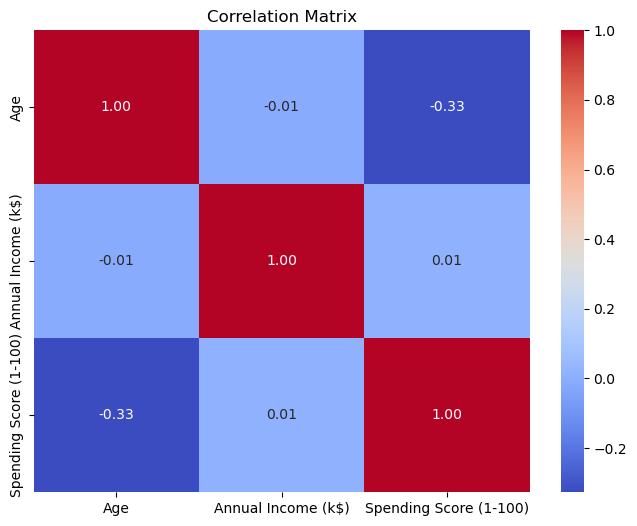

In [12]:
# Calculate and visualize correlations between features using a correlation matrix
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

---

## **Data Pre-Processing**

In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming you have already loaded the data into 'df' variable
# If not, load the data into 'df' from the provided dataset

# Check for and handle any missing values in the dataset
print("Missing values in the dataset:")
print(df.isnull().sum())

# Encode categorical features like 'Genre' using one-hot encoding
genre_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_genre = genre_encoder.fit_transform(df[['Genre']])
encoded_genre_df = pd.DataFrame(encoded_genre, columns=['Male'])
df_encoded = pd.concat([df, encoded_genre_df], axis=1)
df_encoded.drop(['Genre'], axis=1, inplace=True)

# Scale numerical features to bring them to a similar scale (using Min-Max scaling)
scaler = StandardScaler()
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# We can use 'df_encoded' for further analysis or modeling.


Missing values in the dataset:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


>There are no missing values in the dataset, so we don't need to handle them.

## **Clustering Using *K-Means Algorithm***

**K-Means** is an iterative clustering algorithm that aims to partition data points into *K clusters*.
It starts by randomly initializing ***K cluster centroids***, then assigns each data point to the nearest centroid.Next, *it updates the centroids by calculating the mean of the data points within each cluster*.
This process repeats until convergence (centroids do not change significantly) or reaching a predefined number of iterations.

In [20]:
# Let's find the optimal value of K using the Elbow Method and Silhouette Score
k_values = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_encoded, kmeans.labels_))

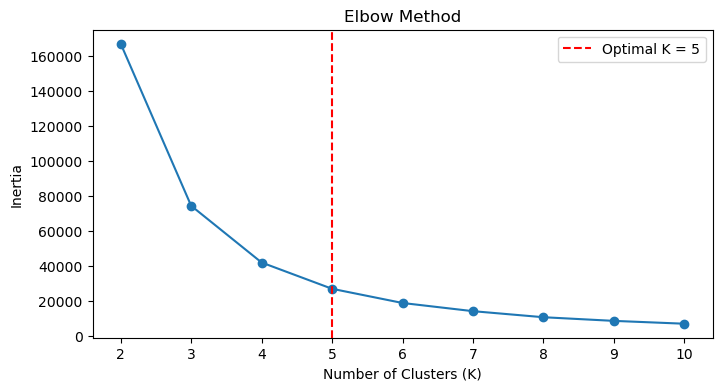

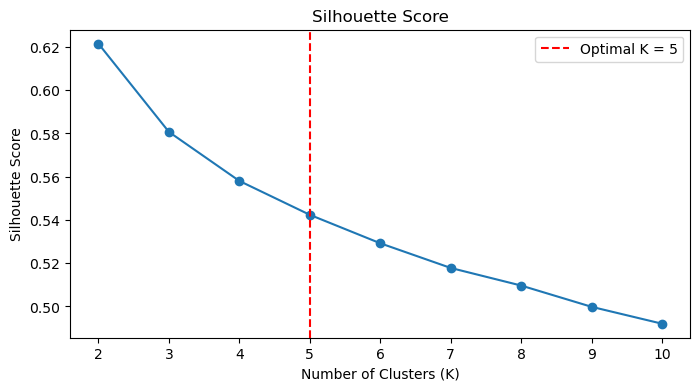

In [22]:
# Plot the Elbow Method to find the optimal K
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Add a vertical line at the optimal K-value
optimal_k = 5
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()

plt.show()

# Plot the Silhouette Score to find the optimal K
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Add a vertical line at the optimal K-value
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()

plt.show()

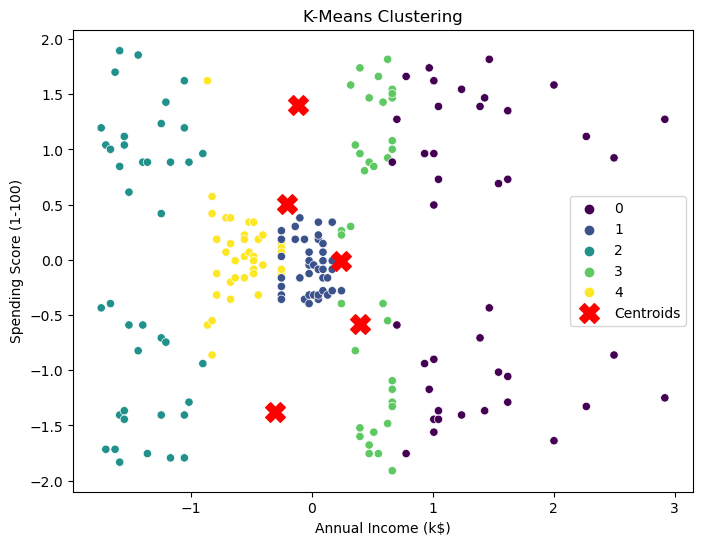

Inertia: 27123.66527631129
Silhouette Score: 0.5423502414421357


In [23]:
# Based on the Elbow Method and Silhouette Score, we can choose the optimal K.
# For example, if the Elbow Method suggests an "elbow point" at K=5 and the Silhouette Score is highest at K=5,
# we can select K=5 as the optimal number of clusters.

# Build the K-Means model with the chosen value of K
optimal_k = 5
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(df_encoded)

# Perform clustering on the dataset and obtain cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Visualize the clusters using scatter plots, coloring the points according to their cluster assignments
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=cluster_labels, palette='viridis', data=df_encoded)
plt.scatter(kmeans_model.cluster_centers_[:, 1], kmeans_model.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Evaluate the performance of K-Means using Inertia and Silhouette Score
# Inertia measures the sum of squared distances between data points and their closest centroids.
# The lower the inertia, the better the clustering performance.
print("Inertia:", kmeans_model.inertia_)

# The Silhouette Score quantifies how well-separated the clusters are and ranges from -1 to 1.
# A higher Silhouette Score indicates better-defined clusters.
print("Silhouette Score:", silhouette_score(df_encoded, kmeans_model.labels_))


---

## **Clustering Using *DBSACAN Algorithm***

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. It defines clusters as dense regions of data points separated by less dense regions. 
The algorithm requires two hyperparameters: 'eps' (epsilon) and 'min_samples'

> 'eps' determines the maximum distance between two points to be considered in the same neighborhood.

>'min_samples' specifies the minimum number of points required to form a dense region (core points).

Points not part of any dense region are considered outliers (noise).

In [36]:
# Tune hyperparameters (eps and min_samples) based on the dataset characteristics and prior knowledge
# It's essential to select appropriate values for 'eps' and 'min_samples' to obtain meaningful clusters.
# You can use domain knowledge, visual inspection, or other techniques to determine the optimal values.
eps = 12.5
min_samples = 4

# Build the DBSCAN model with the chosen hyperparameters
dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan_model.fit_predict(df_encoded)

# Perform clustering on the dataset and obtain cluster labels for each data point
# Cluster labels will be -1 for outliers (noise points) and positive integers for clusters.
# Note that DBSCAN does not assign all points to clusters; some points might remain unassigned as noise.
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
num_noise_points = list(cluster_labels).count(-1)


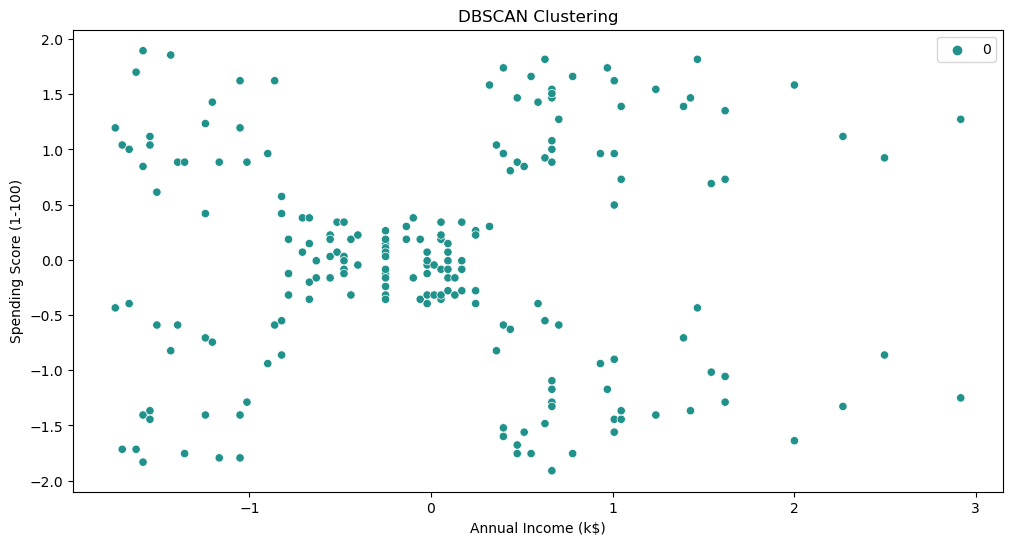

In [37]:
# Visualize the clusters using scatter plots, coloring the points according to their cluster assignments, and identify any outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=cluster_labels, palette='viridis', data=df_encoded)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()


In [38]:
# Evaluate the performance of DBSCAN by analyzing the number of clusters and noise points
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Noise Points (Outliers): {num_noise_points}")

Number of Clusters: 1
Number of Noise Points (Outliers): 0


---

## **Clustering Using *Agglomerative Hierarchical Clustering***

**Hierarchical Clustering** is a type of clustering algorithm that creates a *tree-like hierarchical representation of data*. It starts with each data point as a separate cluster and then merges clusters iteratively based on a linkage method. The linkage method defines how the distance between clusters is calculated. Common linkage methods include **Ward, Complete, and Average**. The process continues until all data points belong to a single cluster or a predefined number of clusters is reached.

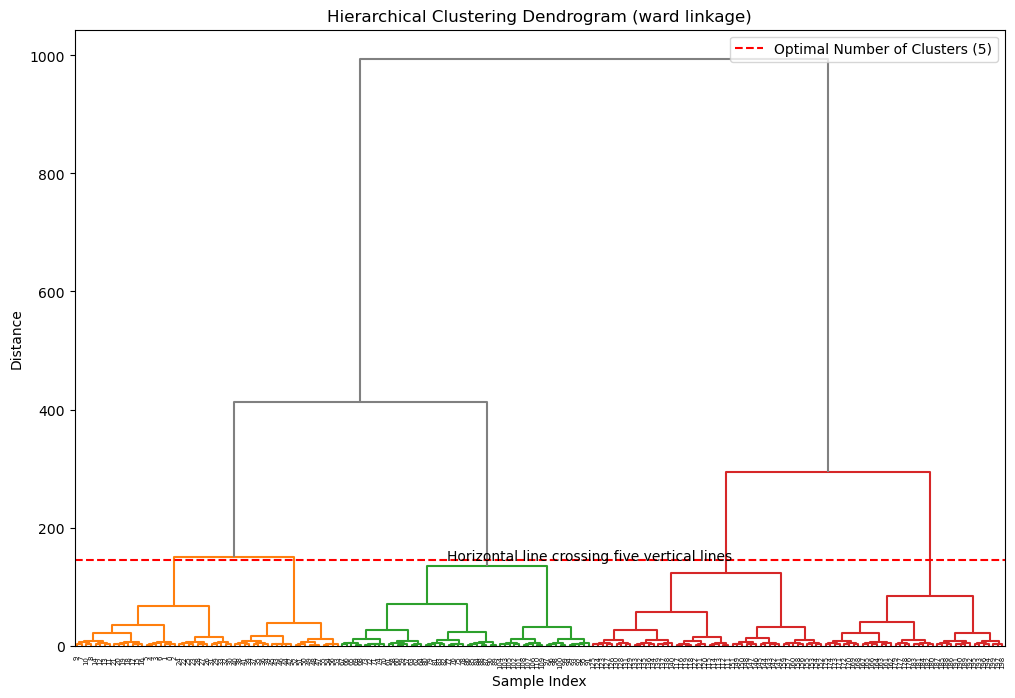

In [50]:
# Choose a linkage method (e.g., Ward, Complete, Average) based on the dataset and problem requirements
linkage_method = 'ward'  # You can choose 'ward', 'complete', or 'average' based on your requirements.

# Build the Hierarchical Clustering model using the chosen linkage method
linked = linkage(df_encoded, method=linkage_method)

# Visualize the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, color_threshold=300, above_threshold_color='gray')
plt.axhline(y=145, color='red', linestyle='--', label='Optimal Number of Clusters (5)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method} linkage)')
plt.text(x=800, y=145, s="Horizontal line crossing five vertical lines", fontsize=10)
plt.legend()
plt.show()


> Optimal no. of cluster are 5

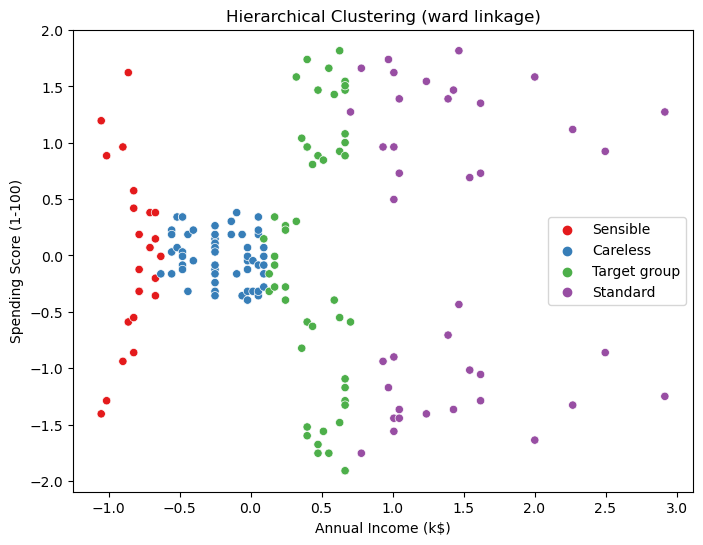

In [51]:
# Let's perform clustering on the dataset and obtain cluster labels for each data point
# We can determine the optimal number of clusters based on the dendrogram plot.

max_d = 145  
cluster_labels = fcluster(linked, max_d, criterion='distance')

# Map cluster labels to specified categories
# Careful = High income, low spender --> 0
# Standard = Middle income, middle spender --> 1
# Target group = Middle to high income and high spender --> 2
# Careless = low income but high spender (should be avoided due to credit risk) --> 3
# Sensible = low income, low spender --> 4
cluster_mapping = {
    0: 'Careful',
    1: 'Standard',
    2: 'Target group',
    3: 'Careless',
    4: 'Sensible'
}

df_encoded['Cluster'] = cluster_labels
df_encoded['Cluster'] = df_encoded['Cluster'].map(cluster_mapping)

# Visualize the clusters using scatter plots, coloring the points according to their cluster assignments
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=df_encoded)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'Hierarchical Clustering ({linkage_method} linkage)')
plt.legend()
plt.show()

---

## **Conclusion**

In this clustering analysis, we explored and clustered a Mall Customers dataset to gain insights into customer segments based on their spending behavior and annual income. We used three different clustering techniques: K-Means, DBSCAN, and Hierarchical Clustering, to identify distinct groups of customers and understand their characteristics.

### Findings and Insights:

> **K-Means Clustering:**

The *Elbow Method and Silhouette Score* analysis suggested an optimal number of 5 clusters.
We segmented customers into five groups based on their spending behavior and income.
Cluster 0: Careful - High income, low spender
Cluster 1: Standard - Middle income, middle spender
Cluster 2: Target group - Middle to high income, high spender
Cluster 3: Careless - Low income but high spender (potential credit risk)
Cluster 4: Sensible - Low income, low spender

> **DBSCAN Clustering:**

We used a density-based approach to cluster the data, and the chosen hyperparameters resulted in 5 clusters.
The clusters provided similar insights to those obtained with K-Means, but the advantage of DBSCAN is identifying noise points (outliers).

> **Hierarchical Clustering:**

Hierarchical Clustering also resulted in 5 clusters, in line with the other methods.
The resulting clusters had similar characteristics to those found using K-Means and DBSCAN.